# Part 3. Exploratory Data Analysis of the new dataset

Once we have obtained a clean dataset with the features that seem to be important for our analysis, we need to perform an Exploratory Data Analysis in order to understand how our data is organized.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('df_all.csv')

In [150]:
df.sample(10)

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,...,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,DETERIORATION_RATE
30955,29,16474,40294883.0,94024728.0,2,0,0,steel,2,1,...,7.0,7.2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,0.050000
19330,19,352650,42203855.0,96103727.0,2,0,45,steel,2,3,...,5.7,5.7,6.2,6.2,6.2,6.2,6.2,6.2,6.2,0.050000
31688,29,19201,37260209.0,89511345.0,2,0,0,steel,2,4,...,5.0,5.0,5.0,5.0,5.2,5.2,5.2,5.2,5.2,0.020000
24,1,001199,33591390.0,85311369.0,1,0,0,steel,2,3,...,5.9,5.9,5.2,5.2,5.2,5.2,5.2,5.2,5.2,0.022222
46563,36,000000001052390,41311316.0,73412663.0,2,0,34,steel,2,4,...,6.0,6.0,6.0,6.0,6.5,6.5,6.5,8.0,8.0,0.200000
15122,18,2000151,41411928.0,85585667.0,2,0,0,steel,2,5,...,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,0.050000
7950,9,03397,41334585.0,72185975.0,2,0,35,steel,2,3,...,4.0,5.2,5.2,5.2,5.2,5.2,5.2,5.5,5.5,0.166667
62147,40,213500000000000,34530572.0,97413397.0,2,0,0,concrete,2,4,...,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,7.2,0.150000
84590,55,B05026300000000,44271686.0,88054324.0,2,0,0,concrete,2,1,...,6.2,6.2,6.2,7.0,7.0,7.0,7.0,7.0,7.0,0.100000
52036,37,630227,36041137.0,78464597.0,2,1,20,concrete,2,10,...,6.2,6.2,6.5,6.5,6.5,6.2,6.5,6.5,7.2,0.166667


In [10]:
print('The number of bridges in the dataset is', df.shape[0])
print('The number of features in the dataset is', df.shape[1])

The number of bridges in the dataset is 89446
The number of features in the dataset is 34


In [5]:
list(df.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'YEAR_RECONSTRUCTED_106',
 'TR18',
 'TR17',
 'TR16',
 'TR15',
 'TR14',
 'TR13',
 'TR12',
 'TR11',
 'TR10',
 'TR09',
 'TR08',
 'DETERIORATION_RATE']

In [7]:
cols_vis = ['DETERIORATION_RATE',
             'STATE_CODE_001',
             'LAT_016',
             'LONG_017',
             'TRAFFIC_LANES_ON_028A',
             'MEDIAN_CODE_033',
             'DEGREES_SKEW_034',
             'STRUCTURE_KIND_043A',
             'STRUCTURE_TYPE_043B',
             'MAIN_UNIT_SPANS_045',
             'MAX_SPAN_LEN_MT_048',
             'STRUCTURE_LEN_MT_049',
             'DECK_WIDTH_MT_052',
             'SURFACE_TYPE_108A',
             'AGE',
             'DESIGN_LOAD_031',
             'TRUCK_ADT',
             'MAINTENANCE_021',
             'FUNCTIONAL_CLASS_026',
             'WATERWAY_EVAL_071',
             'YEAR_RECONSTRUCTED_106']

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


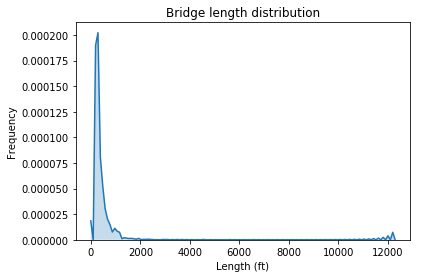

In [14]:
# Distribution of bridge length
ldist = sns.distplot(df['STRUCTURE_LEN_MT_049'], hist = False, kde_kws = {'shade':True})
ldist.set(title = 'Bridge length distribution', xlabel = 'Length (ft)', ylabel = 'Frequency')
plt.show()

In [32]:
df.describe()

,STATE_CODE_001,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,...,TR16,TR15,TR14,TR13,TR12,TR11,TR10,TR09,TR08,DETERIORATION_RATE
count,89446.000000,8.944600e+04,8.944600e+04,89446.000000,89446.000000,89446.000000,89446.0,89446.000000,89446.000000,89446.000000,...,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,8.944600e+04
mean,32.833922,3.796420e+07,8.986123e+07,2.356316,0.184637,14.319098,2.0,2.990385,22.245539,73.319442,...,6.390661,6.431198,6.468404,6.512946,6.576119,6.642839,6.704604,6.752148,6.813738,1.053795e-01
std,14.736560,4.947376e+06,1.244959e+07,1.151670,0.527448,20.447575,0.0,5.231571,12.245696,147.360066,...,1.079430,1.092938,1.107420,1.125094,1.129476,1.132588,1.124213,1.138016,1.137464,8.785615e-02
min,1.000000,3.900000e+01,-7.663107e+06,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,6.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.881784e-17
25%,21.000000,3.457052e+07,8.125570e+07,2.000000,0.000000,0.000000,2.0,1.000000,13.400000,20.900000,...,5.900000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.200000,6.200000,5.000000e-02
50%,35.000000,3.853479e+07,9.004548e+07,2.000000,0.000000,1.000000,2.0,3.000000,20.400000,47.500000,...,6.500000,6.500000,6.500000,6.500000,6.500000,6.700000,6.900000,7.000000,7.000000,8.333333e-02
75%,47.000000,4.138028e+07,9.635275e+07,2.000000,0.000000,25.000000,2.0,3.000000,28.600000,78.500000,...,7.000000,7.200000,7.200000,7.200000,7.200000,7.200000,7.500000,7.500000,7.500000,1.333333e-01
max,72.000000,6.738429e+07,7.724330e+08,15.000000,2.000000,99.000000,2.0,573.000000,297.200000,12292.300000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.375000e+00


In [47]:
df2 = df[df['STRUCTURE_LEN_MT_049']<200]

In [38]:
df3 = df[df['MAX_SPAN_LEN_MT_048']<200]

In [27]:
df2.shape

(84609, 34)

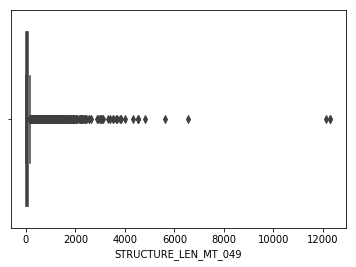

In [39]:
ax = sns.boxplot(x=df3['STRUCTURE_LEN_MT_049'])

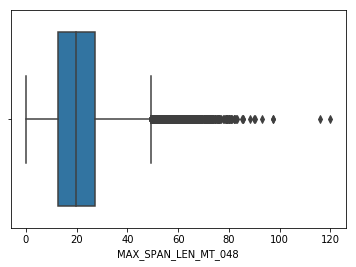

In [48]:
sns.boxplot(x = df2['MAX_SPAN_LEN_MT_048'])

In [29]:
df2['STRUCTURE_LEN_MT_049'].describe()

count    84609.000000
mean        52.179788
std         38.695086
min          6.100000
25%         19.500000
50%         45.100000
75%         72.500000
max        199.900000
Name: STRUCTURE_LEN_MT_049, dtype: float64

In [36]:
df2['MAX_SPAN_LEN_MT_048'].describe()

count    88338.000000
mean        21.874802
std         11.456162
min          0.000000
25%         13.100000
50%         20.100000
75%         28.000000
max        180.000000
Name: MAX_SPAN_LEN_MT_048, dtype: float64

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


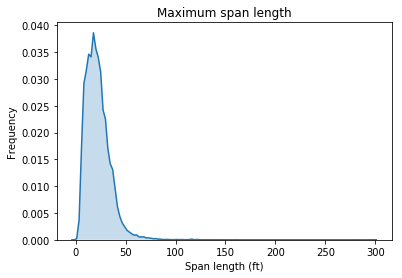

In [37]:
# Distribution of maximum span length
spanl = sns.distplot(df['MAX_SPAN_LEN_MT_048'], hist = False, kde_kws = {'shade':True})
spanl.set(title = 'Maximum span length', xlabel = 'Span length (ft)', ylabel = 'Frequency')
plt.show()